In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import pearsonr
import re
plt.style.use('ggplot')


In [172]:
#load the data
df = pd.read_csv("../Data/nba-stats-first2seasons.csv")

In [173]:
df.shape

(1346, 92)

In [174]:
df = df.dropna().reset_index(drop=True)

In [175]:
df.shape

(994, 92)

In [176]:
df.columns[:30]

Index(['Season', 'Player', 'Age_year1', 'Age_year2', 'Tm_year1', 'Tm_year2',
       'G_year1', 'G_year2', 'GS_year1', 'GS_year2', 'MP_year1', 'MP_year2',
       'FGA_year1', 'FGA_year2', '2PA_year1', '2PA_year2', '3PA_year1',
       '3PA_year2', 'FTA_year1', 'FTA_year2', 'ORB_year1', 'ORB_year2',
       'DRB_year1', 'DRB_year2', 'AST_year1', 'AST_year2', 'STL_year1',
       'STL_year2', 'BLK_year1', 'BLK_year2'],
      dtype='object')

In [177]:
df.describe()

,Age_year1,Age_year2,G_year1,G_year2,GS_year1,GS_year2,MP_year1,MP_year2,FGA_year1,FGA_year2,...,OBPM_year1,OBPM_year2,DBPM_year1,DBPM_year2,BPM_year1,BPM_year2,VORP_year1,VORP_year2,all_star,rising_star
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,21.972837,23.042254,50.673038,53.988934,16.456740,22.099598,16.712676,19.411771,5.413179,6.551408,...,-2.225252,-1.646378,-0.454930,-0.325352,-2.680584,-1.972938,0.073139,0.369517,0.114688,0.179074
std,2.010613,2.105530,23.517274,23.392420,23.134021,26.980451,8.247579,9.146139,3.294739,3.963334,...,2.346808,2.671145,1.287879,1.208305,2.847029,3.108165,0.726296,1.014282,0.318806,0.383608
min,18.000000,19.000000,2.000000,2.000000,0.000000,0.000000,2.800000,3.400000,0.700000,0.600000,...,-13.900000,-14.800000,-5.600000,-6.600000,-18.900000,-19.200000,-2.000000,-2.000000,0.000000,0.000000
25%,21.000000,22.000000,31.000000,37.000000,0.000000,1.000000,10.100000,12.000000,3.100000,3.600000,...,-3.600000,-3.000000,-1.200000,-1.100000,-4.300000,-3.575000,-0.300000,-0.200000,0.000000,0.000000
50%,22.000000,23.000000,52.000000,60.000000,4.000000,8.000000,15.550000,18.300000,4.500000,5.650000,...,-2.200000,-1.500000,-0.500000,-0.400000,-2.600000,-1.700000,-0.100000,0.000000,0.000000,0.000000
75%,23.000000,24.000000,73.000000,74.000000,25.000000,38.750000,22.450000,26.300000,7.000000,8.700000,...,-0.700000,0.000000,0.375000,0.400000,-0.800000,-0.100000,0.200000,0.600000,0.000000,0.000000
max,35.000000,36.000000,82.000000,82.000000,82.000000,82.000000,40.100000,42.400000,19.800000,21.100000,...,9.700000,7.600000,5.000000,3.600000,9.800000,8.800000,5.400000,9.100000,1.000000,1.000000


In [178]:
print(df['all_star'].value_counts())

0    880
1    114
Name: all_star, dtype: int64


In [179]:
df = df.astype({"all_star":'category'})

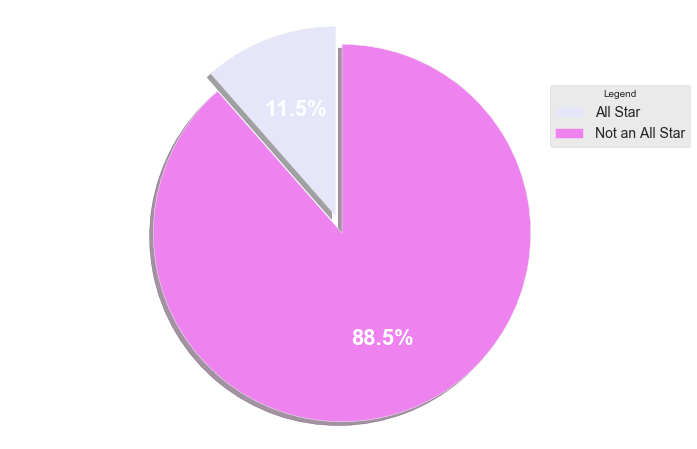

In [180]:
# plotting original data
labels = 'All Star', 'Not an All Star'
btc_1 = [sum(df.all_star), (df.all_star == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['lavender', 'violet']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

In [181]:
feature_list = []

## Season

In [182]:
print(df.Season)

0      1996-97
1      1996-97
2      1996-97
3      1996-97
4      1996-97
        ...   
989    2018-19
990    2018-19
991    2018-19
992    2018-19
993    2018-19
Name: Season, Length: 994, dtype: object


In [183]:
df['year'] = df['Season'].apply(lambda x: str(x)[:4])
df['year']

0      1996
1      1996
2      1996
3      1996
4      1996
       ... 
989    2018
990    2018
991    2018
992    2018
993    2018
Name: year, Length: 994, dtype: object

TODO:
Gather pace statistics
Divide relevant features by pace
check for outliers in al features
generate plots (pairplots)
dimensionality reduction
modeling


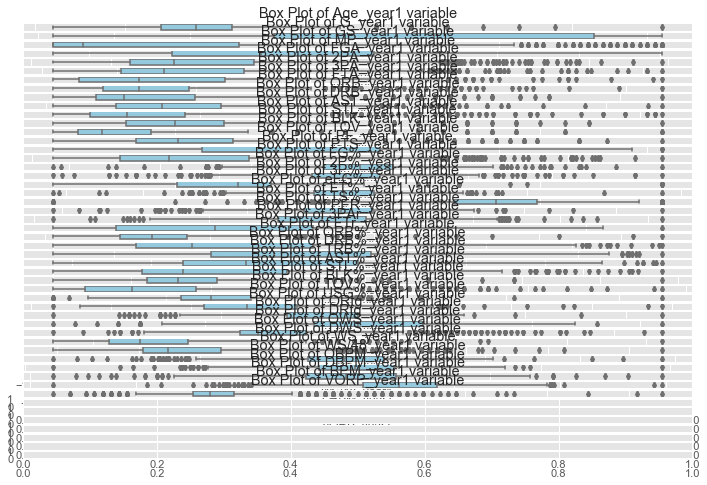

In [184]:
count = 0
f, ax = plt.subplots(50)
for col in df.columns:
    if "year1" in str(col) and "Tm" not in str(col):
        #sns.set(rc={'figure.figsize':(12,8)})
        sns.boxplot(x=df[col], ax = ax[count], color='skyblue')
        ax[count].set_title("Box Plot of {} variable".format(col))
        count += 1

In [185]:
husl = sns.color_palette('husl',8)
# 0 = non all-star: red
# 1 = all-star: green
palette = {
    0 : husl[3],
    1 : husl[6]
}

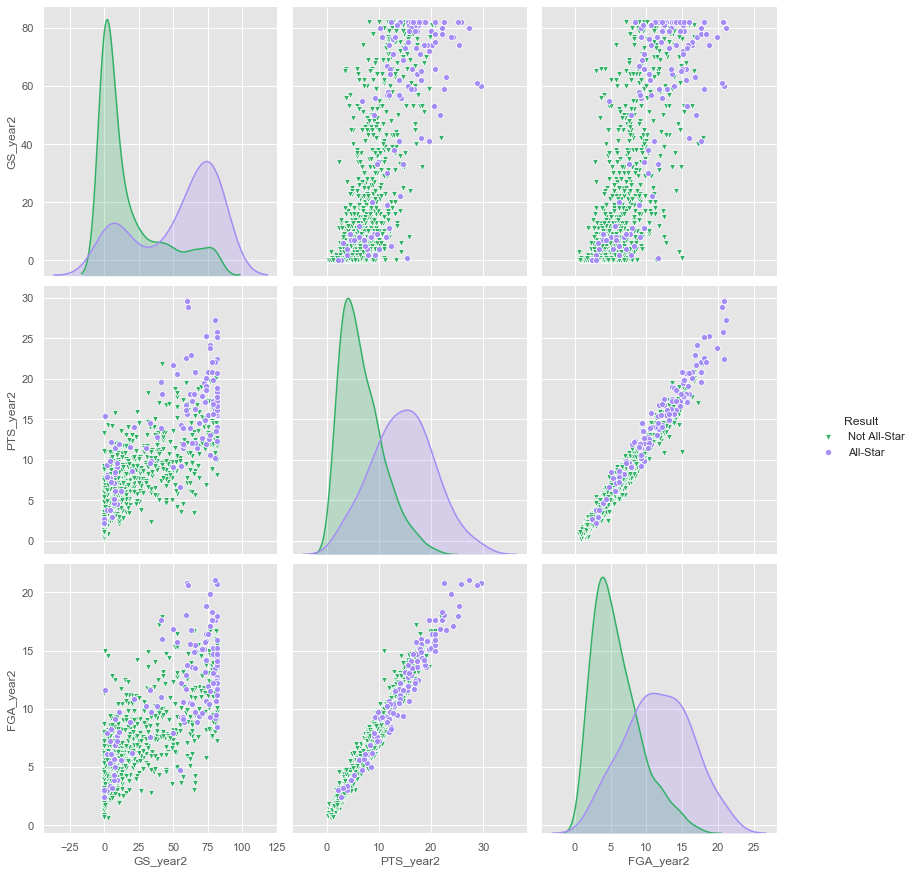

In [186]:
pairplot_features = [
    'GS_year2',
    'PTS_year2',
    'FGA_year2'
]

ax = sns.pairplot(data=df, vars=pairplot_features, hue='all_star', 
                  markers=['v', 'o'], palette=palette, height=4)
ax._legend.set_title('Result')
new_labels = ['Not All-Star', 'All-Star']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
plt.subplots_adjust(right=0.85)
#plt.savefig('./Plots/scattermatrix.png')
plt.show()

In [204]:
df.columns[48:]

Index(['PER_year1', 'PER_year2', '3PAr_year1', '3PAr_year2', 'FTr_year1',
       'FTr_year2', 'ORB%_year1', 'ORB%_year2', 'DRB%_year1', 'DRB%_year2',
       'TRB%_year1', 'TRB%_year2', 'AST%_year1', 'AST%_year2', 'STL%_year1',
       'STL%_year2', 'BLK%_year1', 'BLK%_year2', 'TOV%_year1', 'TOV%_year2',
       'USG%_year1', 'USG%_year2', 'ORtg_year1', 'ORtg_year2', 'DRtg_year1',
       'DRtg_year2', 'OWS_year1', 'OWS_year2', 'DWS_year1', 'DWS_year2',
       'WS_year1', 'WS_year2', 'WS/48_year1', 'WS/48_year2', 'OBPM_year1',
       'OBPM_year2', 'DBPM_year1', 'DBPM_year2', 'BPM_year1', 'BPM_year2',
       'VORP_year1', 'VORP_year2', 'all_star', 'rising_star', 'year',
       'GS%_year1', 'GS%_year2'],
      dtype='object')

In [234]:
cols1 = ['Age', 'G', 'GS', 'GS%', 'MP', 'FGA', '2PA', '3PA', 'FTA']

In [235]:
cols2 = ['FG%', '2P%', '3P%','eFG%', 'FT%', 'TS%']

In [258]:
cols3 = ['ORB', 'DRB', 'AST', 'STL', 'BLK', 
       'TOV', 'PF', 'PTS']

In [259]:
cols4 = ['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']

In [207]:
cols4 = ['PER_year1', 'PER_year2', '3PAr_year1', '3PAr_year2', 'FTr_year1',
       'FTr_year2', 
       'USG%_year1', 'USG%_year2', 'ORtg_year1', 'ORtg_year2', 'DRtg_year1',
       'DRtg_year2', 'OWS_year1', 'OWS_year2', 'DWS_year1', 'DWS_year2',
       'WS_year1', 'WS_year2', 'WS/48_year1', 'WS/48_year2', 'OBPM_year1',
       'OBPM_year2', 'DBPM_year1', 'DBPM_year2', 'BPM_year1', 'BPM_year2',
       'VORP_year1', 'VORP_year2']

In [215]:
cols4 = []
len(cols1)

15

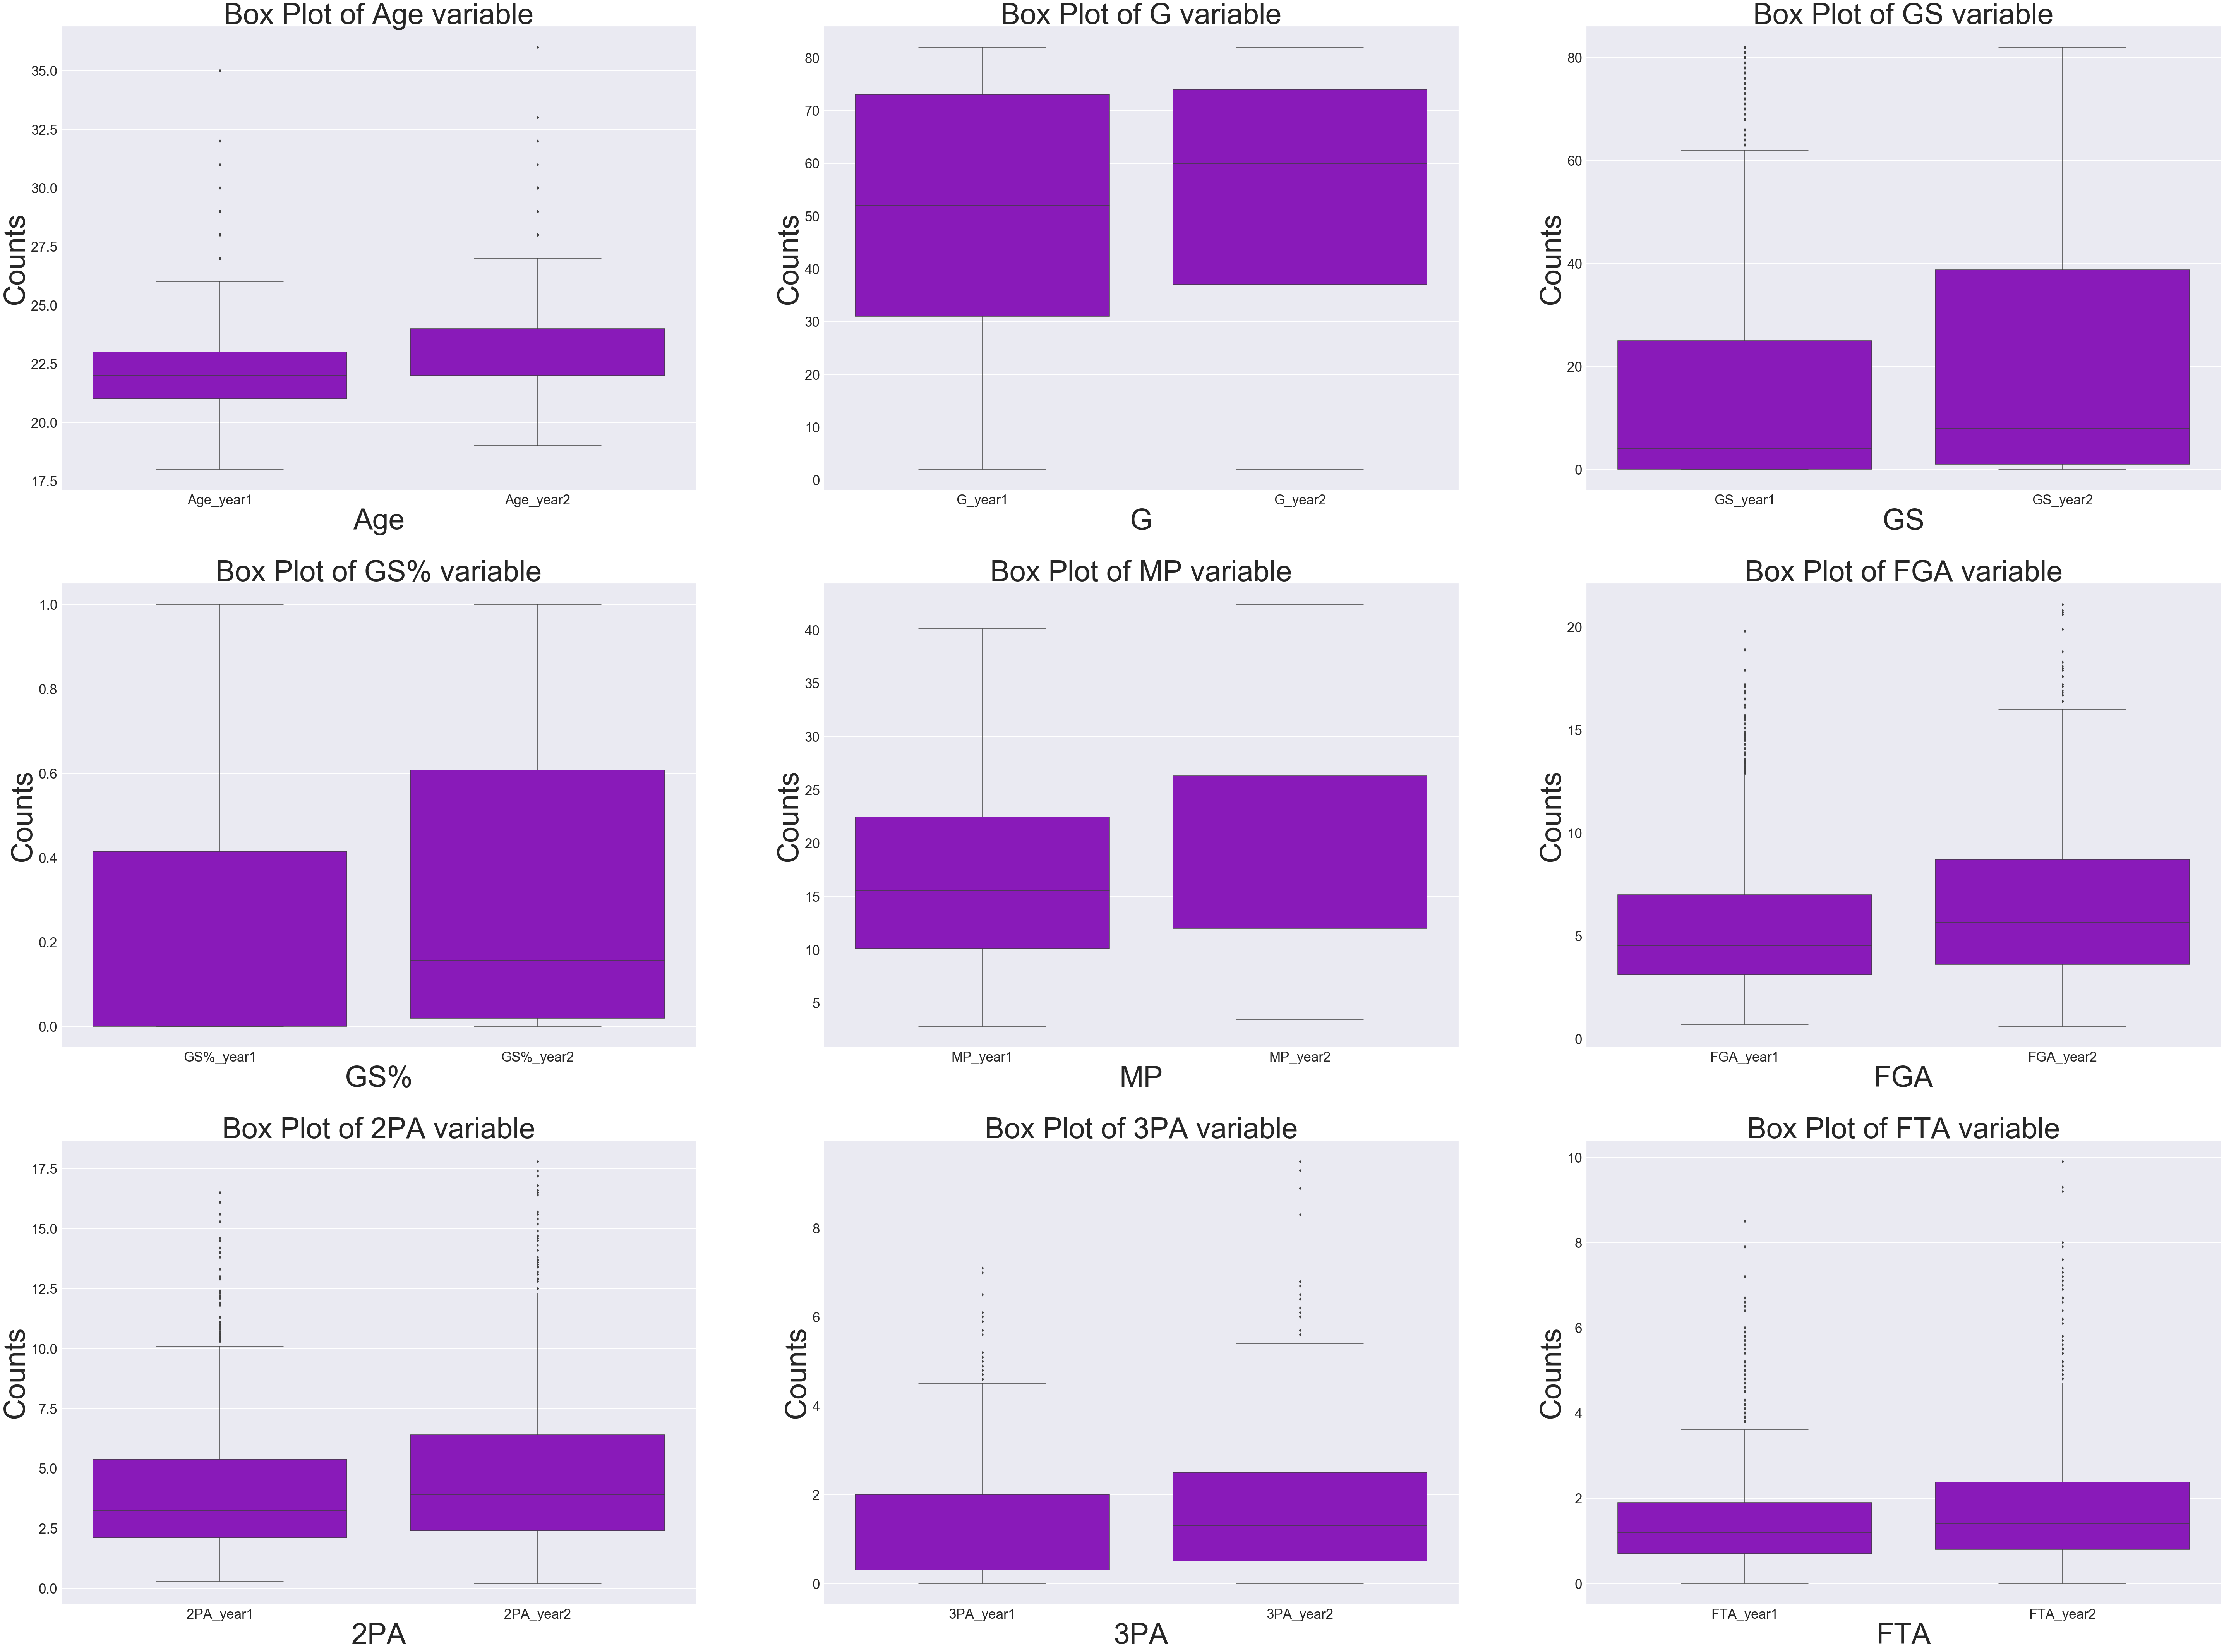

In [254]:
l = 0
w = 0
f, ax = plt.subplots(3,3, figsize=(100,75))
for col in cols1:
    sns.set()
    sns.boxplot(data = df[[col+'_year1', col+'_year2']], ax = ax[l][w], color='darkviolet')
    ax[l][w].set_xlabel(str(col),fontsize=75)
    ax[l][w].set_ylabel("Counts",fontsize=75)
    ax[l][w].tick_params(labelsize=35)
    ax[l][w].set_title("Box Plot of {} variable".format(col), fontsize=75)
    
    w += 1
    if w > 2:
        w = 0
        l += 1
    if l > 2:
        l = 0
#f.subplots_adjust(right=0.85)
#f.tight_layout()

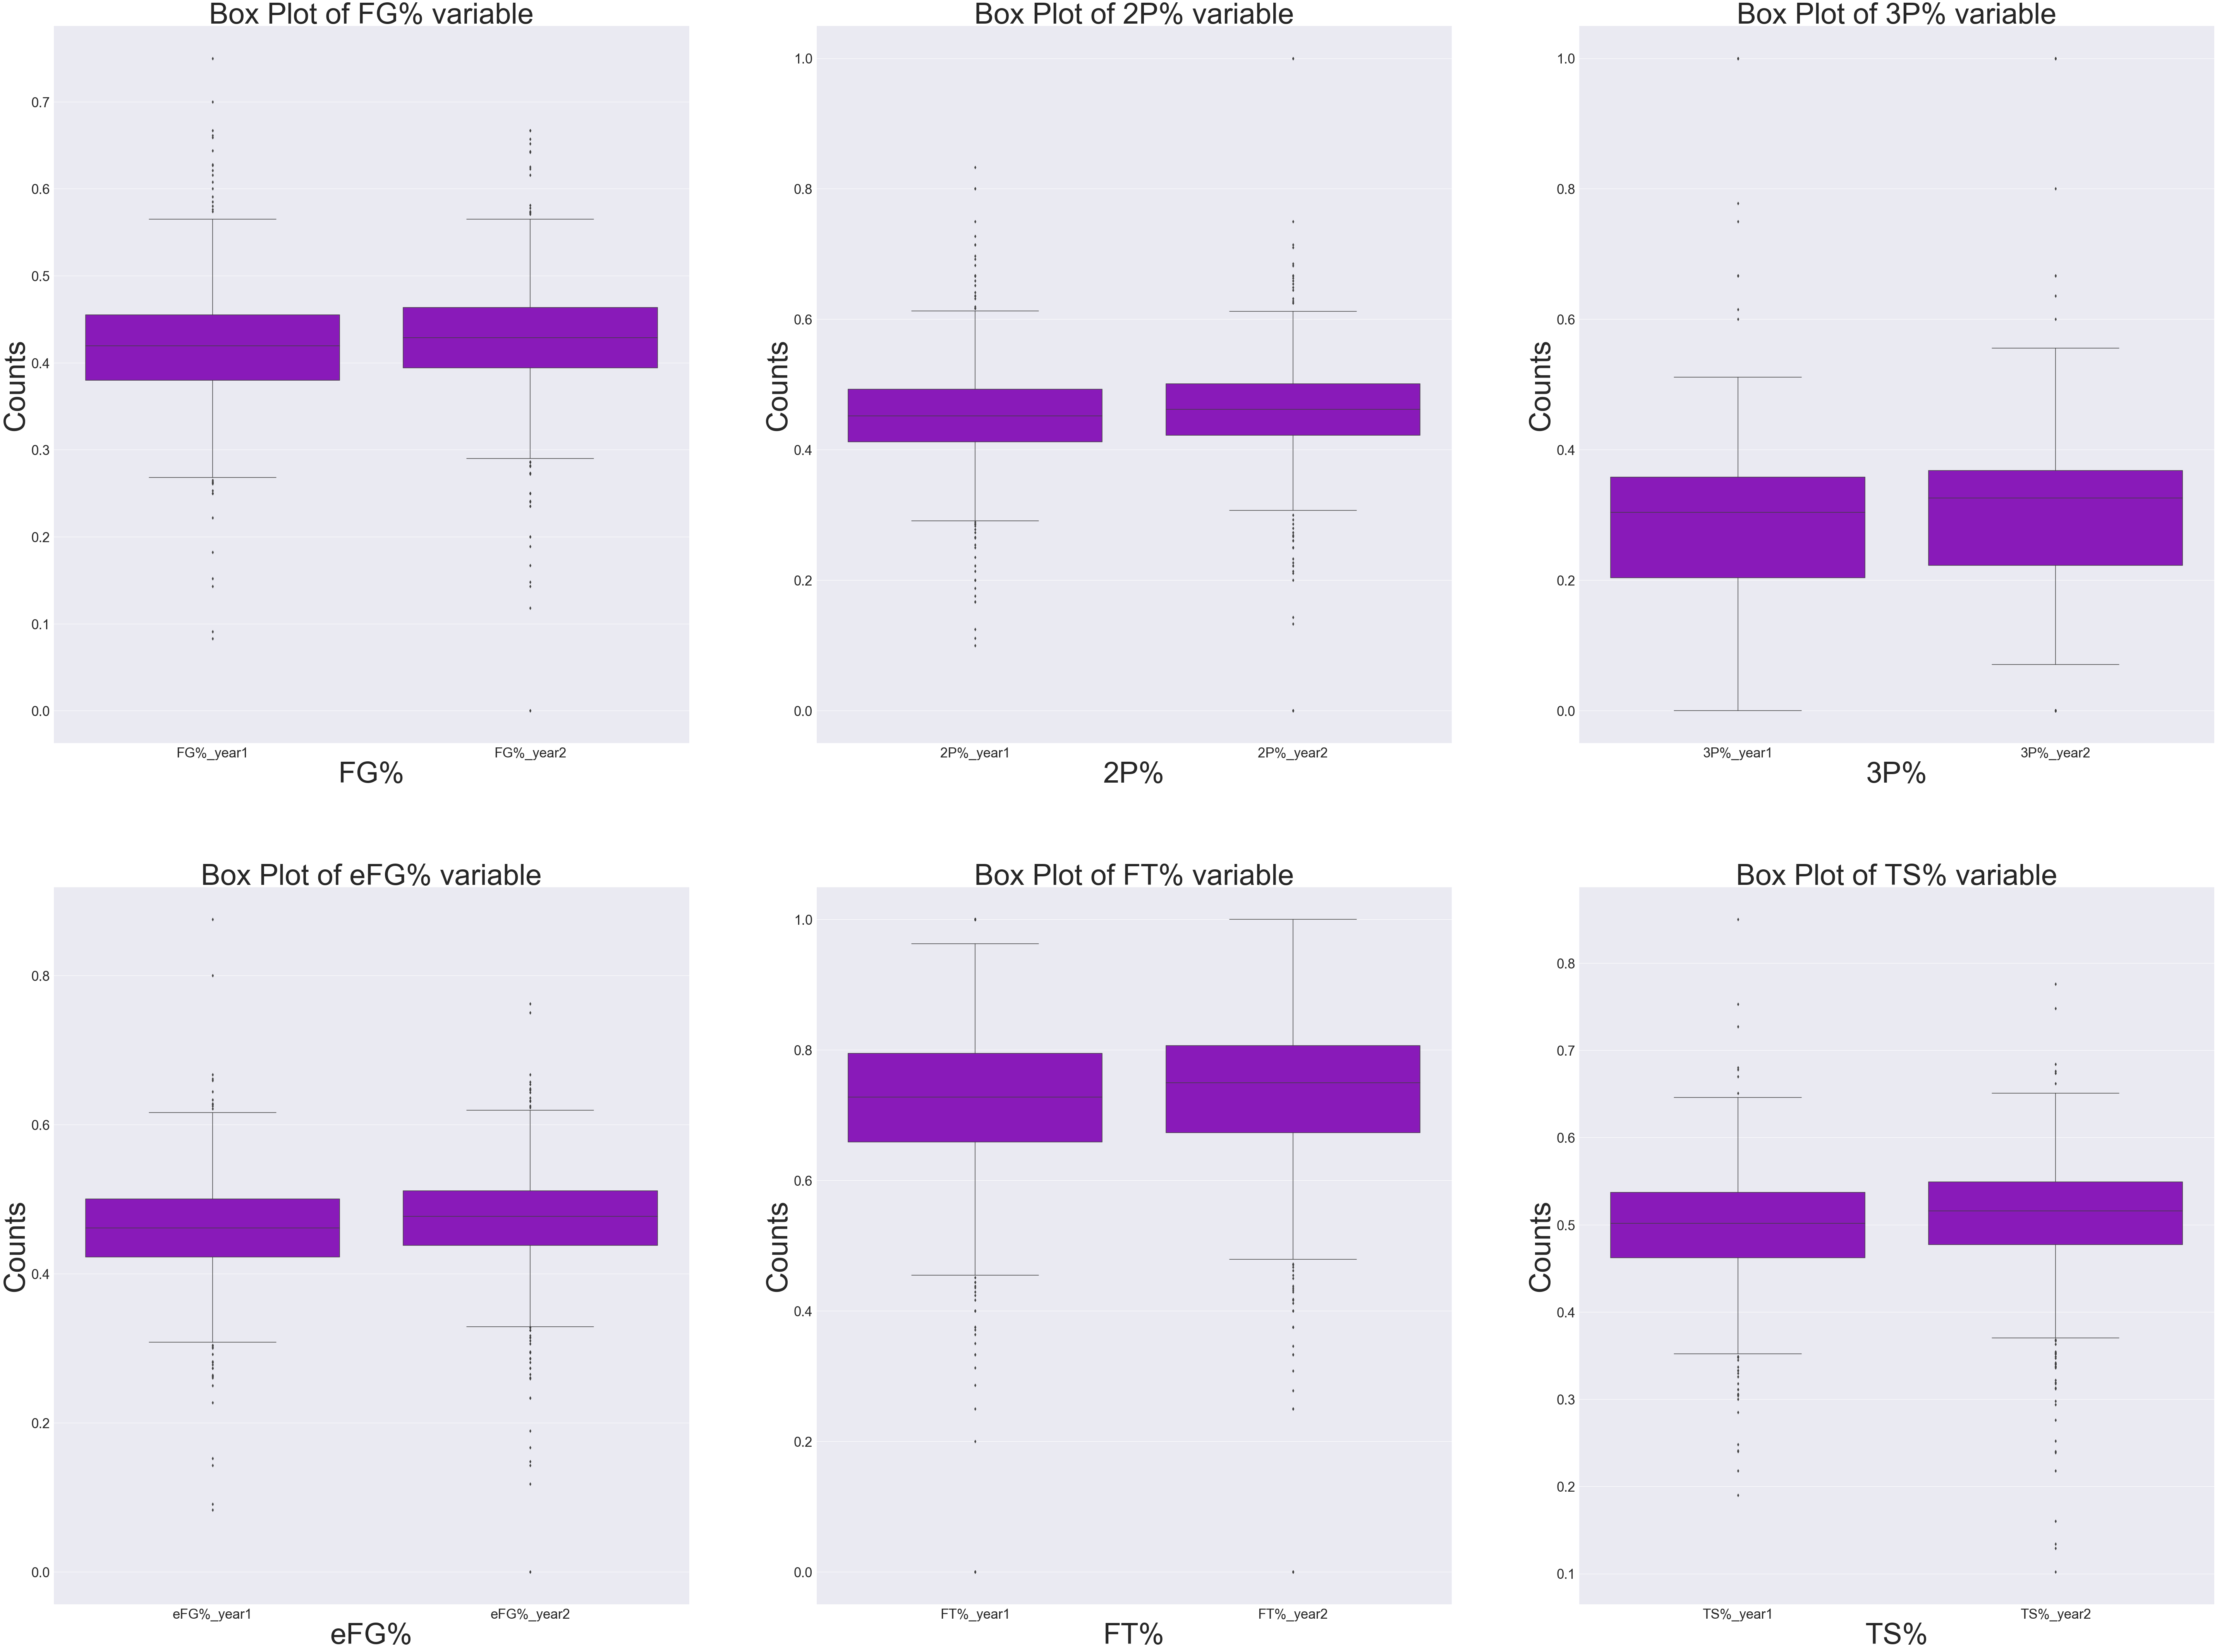

In [257]:
l = 0
w = 0
f, ax = plt.subplots(2,3, figsize=(100,75))
for col in cols2:
    sns.set()
    sns.boxplot(data = df[[col+'_year1', col+'_year2']], ax = ax[l][w], color='darkviolet')
    ax[l][w].set_xlabel(str(col),fontsize=75)
    ax[l][w].set_ylabel("Counts",fontsize=75)
    ax[l][w].tick_params(labelsize=35)
    ax[l][w].set_title("Box Plot of {} variable".format(col), fontsize=75)
    
    w += 1
    if w > 2:
        w = 0
        l += 1
    if l > 1:
        l = 0

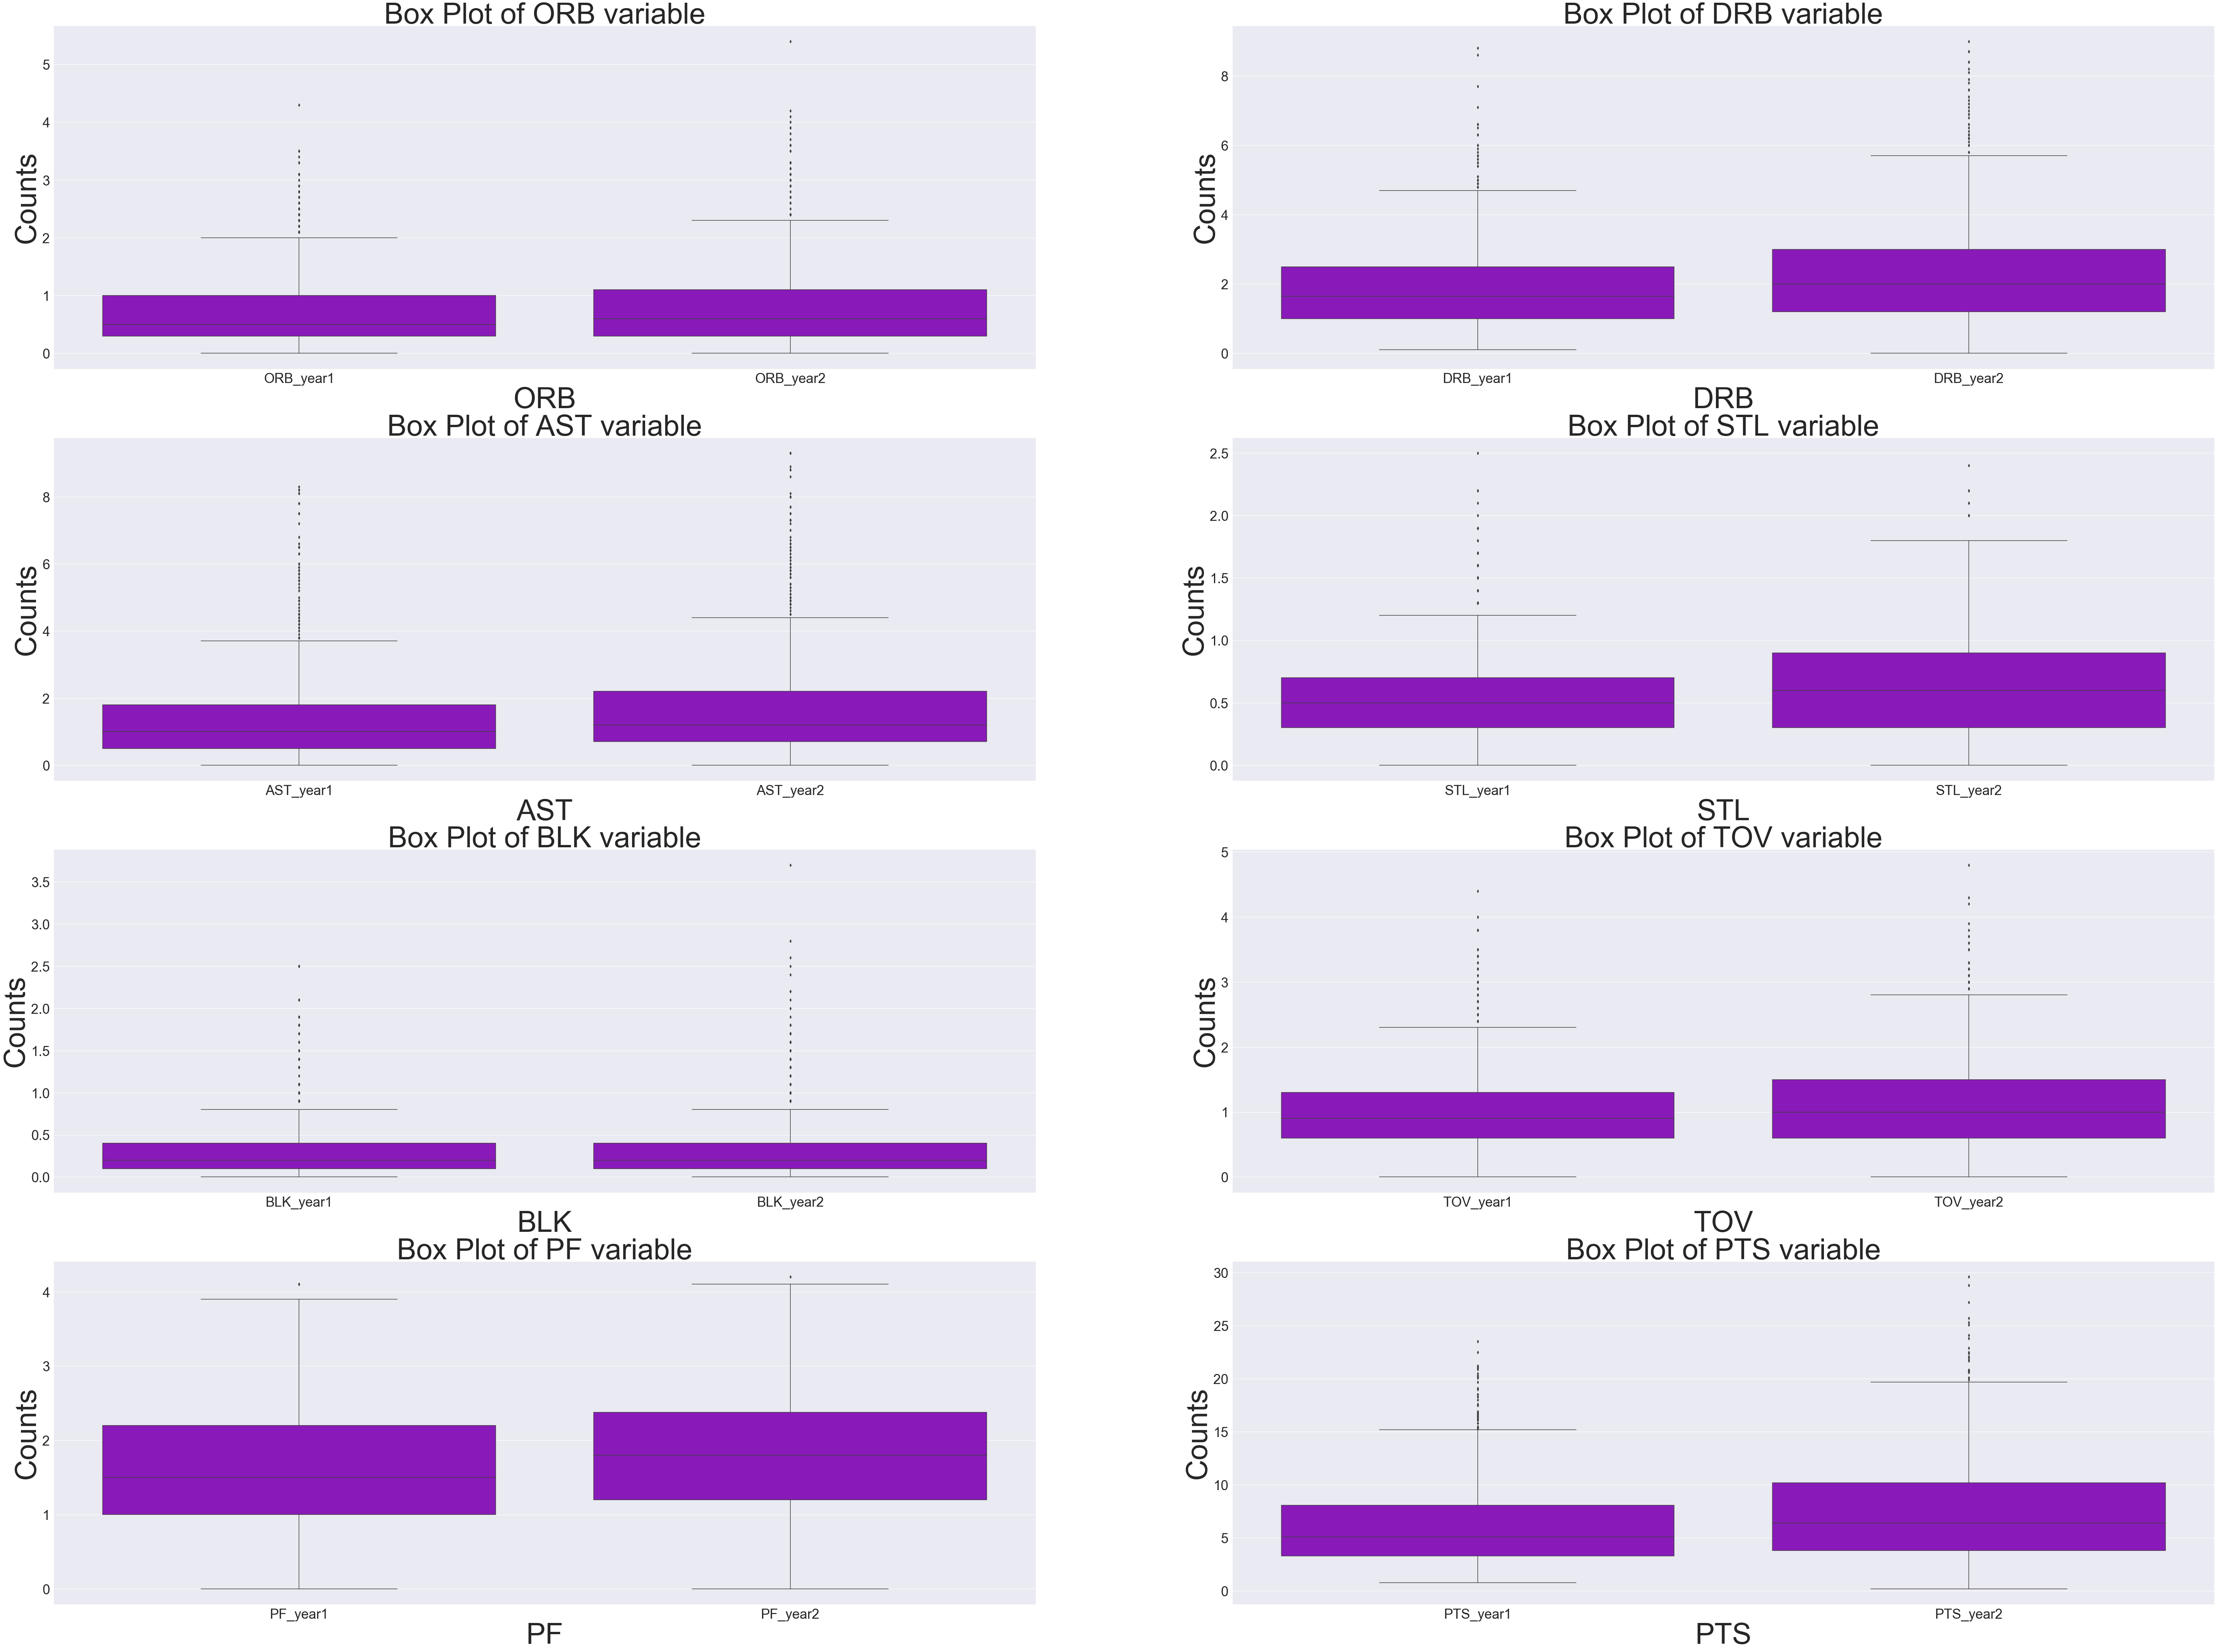

In [260]:
l = 0
w = 0
f, ax = plt.subplots(4,2, figsize=(100,75))
for col in cols3:
    sns.set()
    sns.boxplot(data = df[[col+'_year1', col+'_year2']], ax = ax[l][w], color='darkviolet')
    ax[l][w].set_xlabel(str(col),fontsize=75)
    ax[l][w].set_ylabel("Counts",fontsize=75)
    ax[l][w].tick_params(labelsize=35)
    ax[l][w].set_title("Box Plot of {} variable".format(col), fontsize=75)
    
    w += 1
    if w > 1:
        w = 0
        l += 1
    if l > 3:
        l = 0

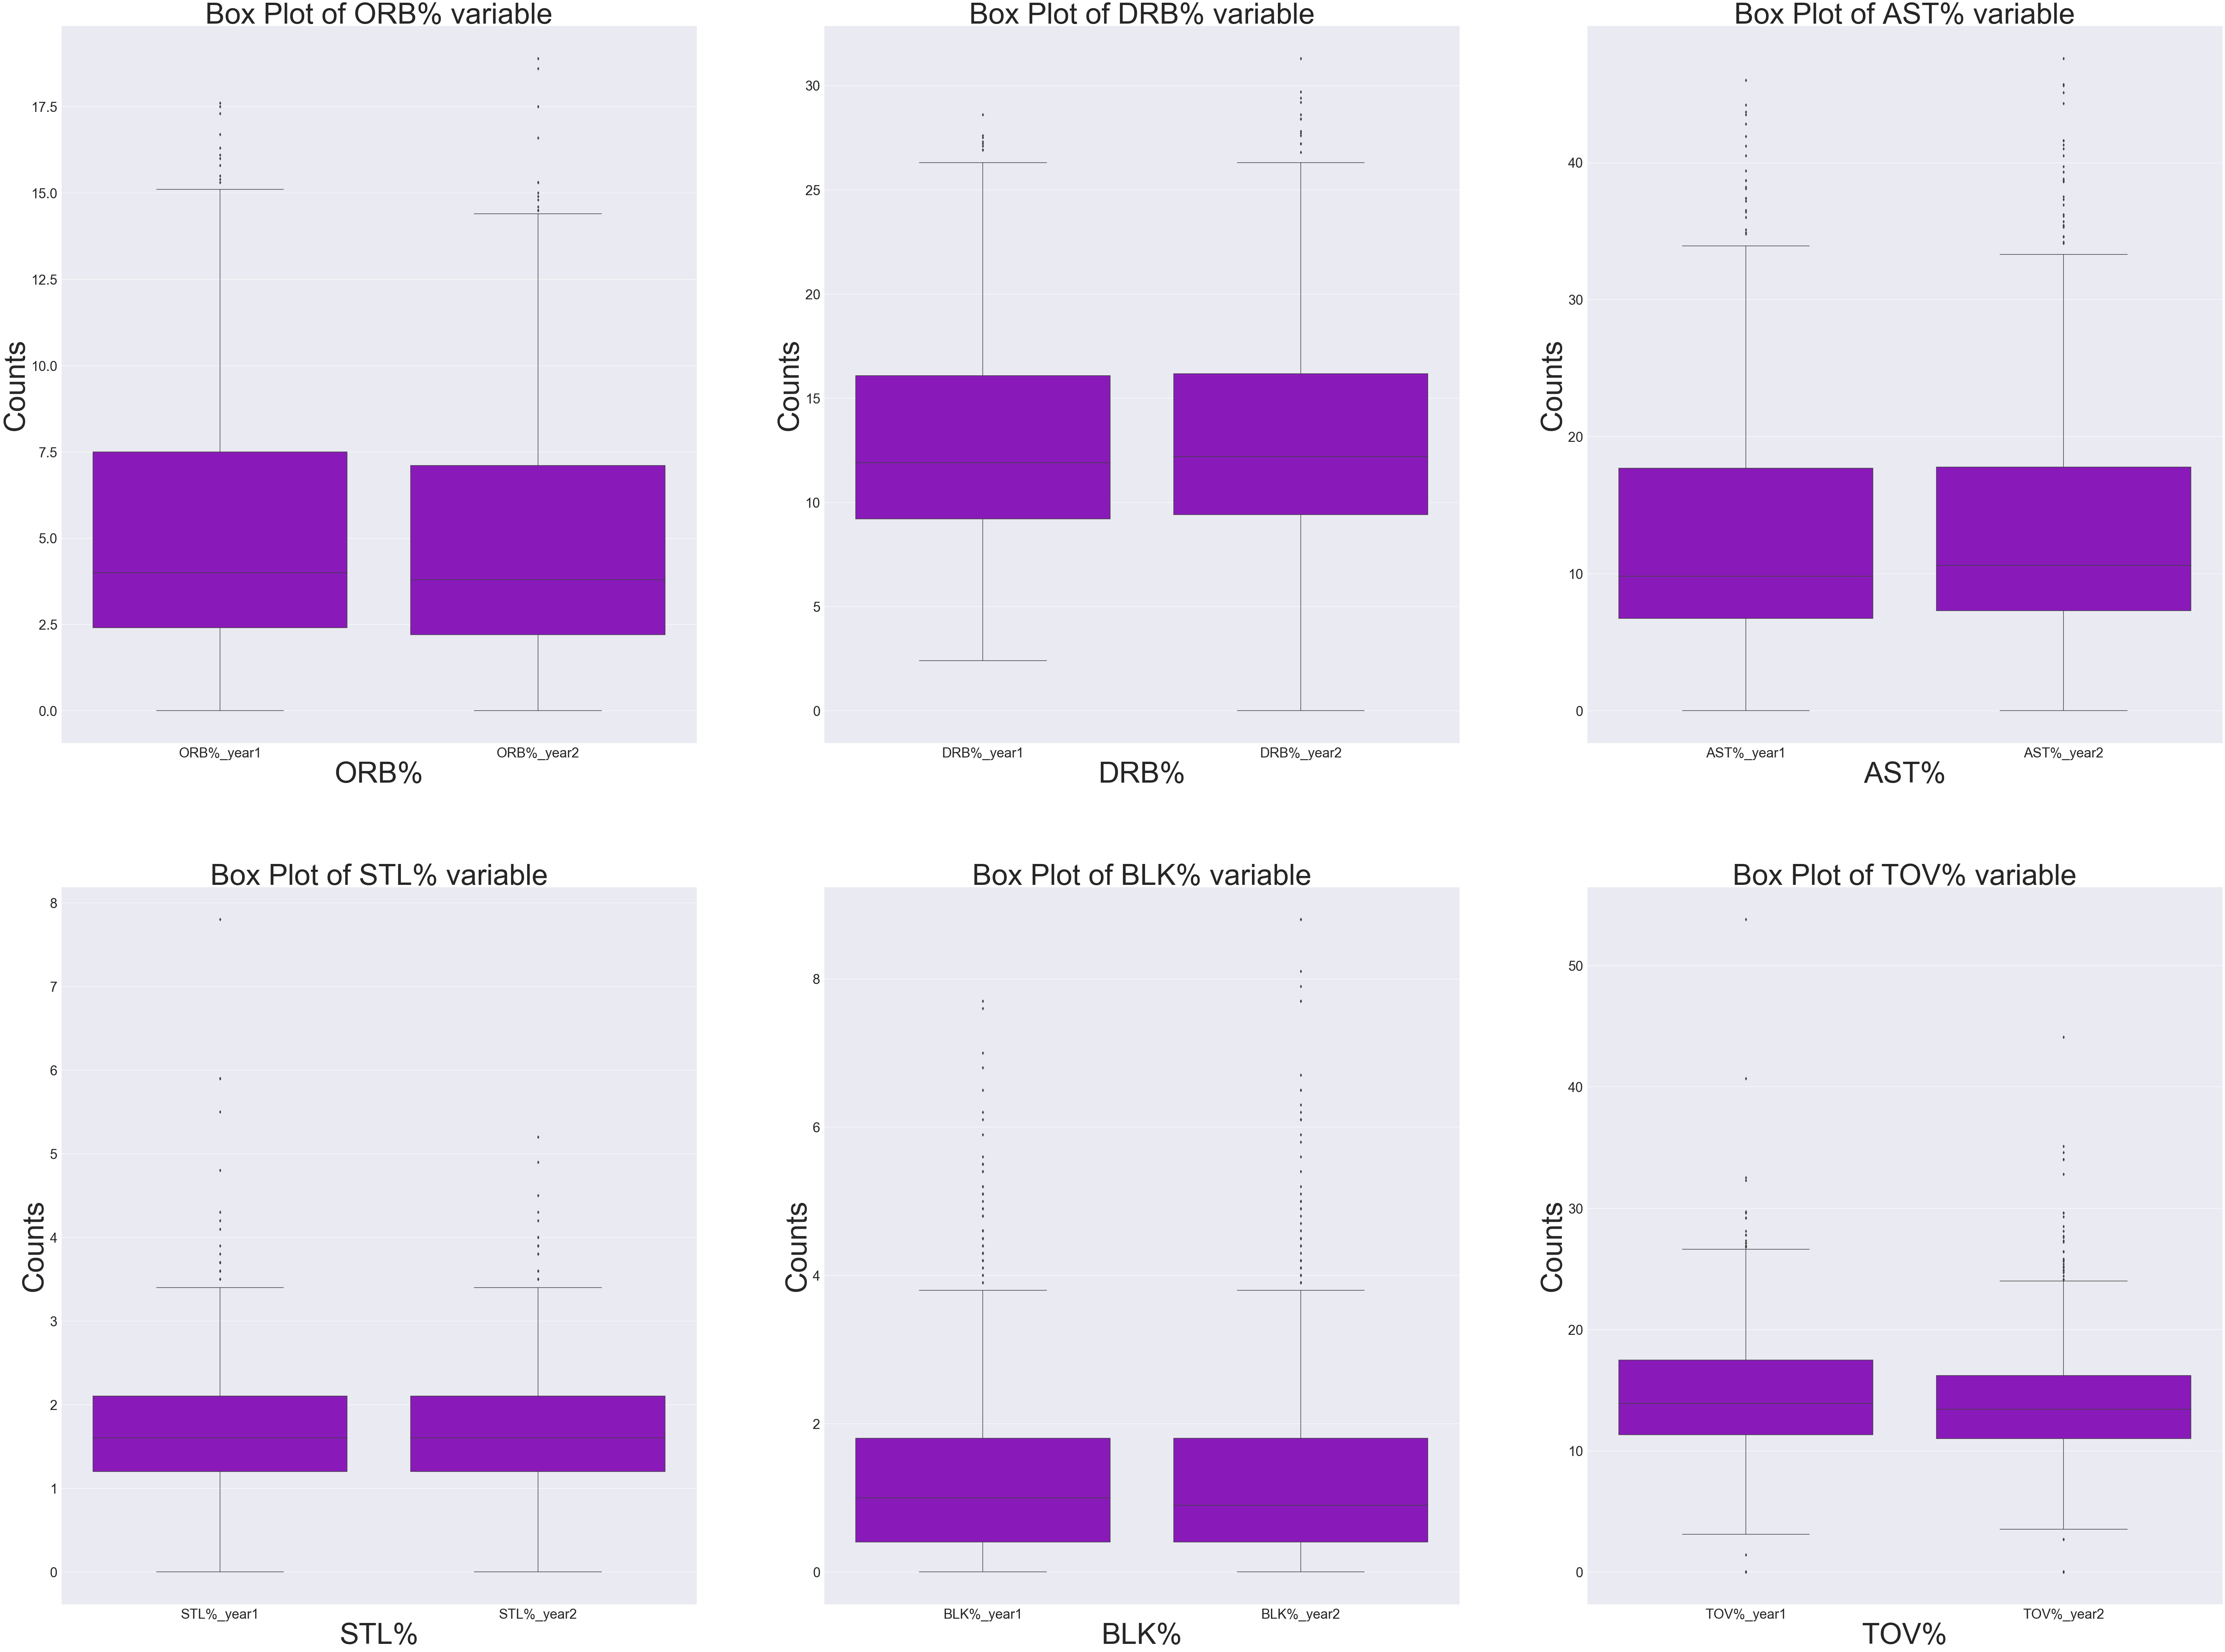

In [261]:
l = 0
w = 0
f, ax = plt.subplots(2,3, figsize=(100,75))
for col in cols4:
    sns.set()
    sns.boxplot(data = df[[col+'_year1', col+'_year2']], ax = ax[l][w], color='darkviolet')
    ax[l][w].set_xlabel(str(col),fontsize=75)
    ax[l][w].set_ylabel("Counts",fontsize=75)
    ax[l][w].tick_params(labelsize=35)
    ax[l][w].set_title("Box Plot of {} variable".format(col), fontsize=75)
    
    w += 1
    if w > 2:
        w = 0
        l += 1
    if l > 2:
        l = 0

In [188]:
print(df.G_year1.describe())
print(df.GS_year1.describe())
print(df.G_year2.describe())
print(df.GS_year2.describe())

count    994.000000
mean      50.673038
std       23.517274
min        2.000000
25%       31.000000
50%       52.000000
75%       73.000000
max       82.000000
Name: G_year1, dtype: float64
count    994.000000
mean      16.456740
std       23.134021
min        0.000000
25%        0.000000
50%        4.000000
75%       25.000000
max       82.000000
Name: GS_year1, dtype: float64
count    994.000000
mean      53.988934
std       23.392420
min        2.000000
25%       37.000000
50%       60.000000
75%       74.000000
max       82.000000
Name: G_year2, dtype: float64
count    994.000000
mean      22.099598
std       26.980451
min        0.000000
25%        1.000000
50%        8.000000
75%       38.750000
max       82.000000
Name: GS_year2, dtype: float64


In [189]:
df['GS%_year1'] = df.GS_year1 / df.G_year1
df['GS%_year2'] = df.GS_year2 / df.G_year2

/Users/coleleppert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


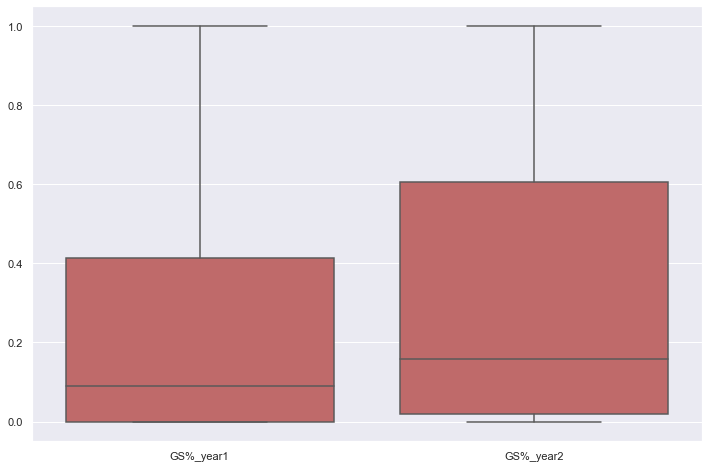

In [199]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data = df[['GS%_year1', 'GS%_year2']], color='indianred')
f.tight_layout()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

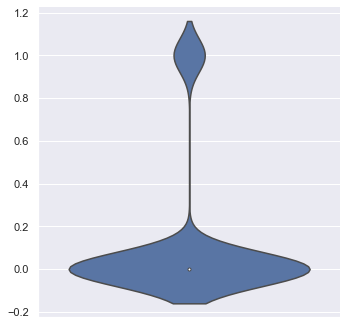

In [196]:
sns.catplot( y=df["all_star"],
            kind="violin", data=df[['GS%_year1', 'GS%_year2']]);

In [76]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['GS%_year1'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['GS%_year1']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.357
Pearsons correlation between belongs_to_collection and revenue: 0.344
